<a href="https://colab.research.google.com/github/MickaRiv/ProjetDatascientest-VoiceSeparator/blob/main/notebooks/benchmark_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install nussl et import systématiques

## Install de nussl

In [ ]:
# à ne faire qu'une fois pour installer le paquet nussl
!pip install nussl

     |████████████████████████████████| 239 kB 9.2 MB/s 
     |████████████████████████████████| 310 kB 60.7 MB/s 
     |████████████████████████████████| 146 kB 53.0 MB/s 
     |████████████████████████████████| 51 kB 68 kB/s 
     |████████████████████████████████| 240 kB 55.3 MB/s 
     |████████████████████████████████| 3.3 MB 21.4 MB/s 
     |████████████████████████████████| 69 kB 7.3 MB/s 
     |████████████████████████████████| 87 kB 6.7 MB/s 
     |████████████████████████████████| 963 kB 31.5 MB/s 
     |████████████████████████████████| 130 kB 53.4 MB/s 
     |████████████████████████████████| 6.2 MB 9.5 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=adb42dd555cc67ad091cc0b60f2d5a8c221e0a6cdd18910b1133013805e17d27
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for gpytorch: filename=gpytorch-1.6.0-py2.py3-none-any.whl size=509894 sha256=2c923ad3f745b5e3a2ec00b

## Imports

In [ ]:
# Chargement des paquets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import librosa
import nussl
import numpy as np
import os,sys
import importlib # pour mise à jour des lib en développement


SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


## Montage du drive et du working directory

Montage du drive

In [ ]:
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")  # we mount the google drive at /content/drive

Mounted at /content/drive


Si développements et besoin de lib locales qui sont dans src, on se déplace sur le clone de git pour développement

In [ ]:
#%cd /content/drive/MyDrive/Projet Datascientest/cloned_git_Ephi/ProjetDatascientest-VoiceSeparator
#%ls
sys.path.append(os.path.join("/content",
                             "drive",
                             "MyDrive",
                             "Projet Datascientest",
                             "cloned_git_Ephi",
                             "ProjetDatascientest-VoiceSeparator")
#os.chdir(os.path.join("drive","MyDrive","Projet Datascientest","cloned_git_Ephi","ProjetDatascientest-VoiceSeparator"))
%reload_ext autoreload
%autoreload 2

/content/drive/.shortcut-targets-by-id/1jB0u0zpR4h_lQKx54NiMAOt1_XxP5nSg/Projet Datascientest/cloned_git_Ephi/ProjetDatascientest-VoiceSeparator
notebooks/  README.md  voice-separator/


Alternativement, possibilité d'utiliser directement la version actuelle de la librairie sur GitHub

In [ ]:
!pip install git+https://github.com/MickaRiv/ProjetDatascientest-VoiceSeparator

  Cloning https://github.com/MickaRiv/ProjetDatascientest-VoiceSeparator to /tmp/pip-req-build-_vo8j_e3
  Running command git clone -q https://github.com/MickaRiv/ProjetDatascientest-VoiceSeparator /tmp/pip-req-build-_vo8j_e3
  Created wheel for voice-separator: filename=voice_separator-0.0.1-py3-none-any.whl size=5556 sha256=bffd0caa689de6d857480552a7dcc4965232db9ea2a76eb730aba1b5e1299d19
  Stored in directory: /tmp/pip-ephem-wheel-cache-rbpuq9vl/wheels/89/ad/91/9cded351057b1a842fbbfa97f091da426d85036b0efd2e0273
Successfully built voice-separator


# Comparaison rapide sur un extrait


## Téléchargement des données

In [ ]:
# Récupération d'une variable musdb_extract avec 7s secondes de chaque musique de la base musdb18
from voicesep.core import get_musdb_data
musdb_extract = get_musdb_data()

# Idem, en regroupant bass, drums et other en un seul stem d'accompagnement
musdb_extract_tfm = get_musdb_data(gather_accompaniment=True)

Done!


##Sélection d'une musique i

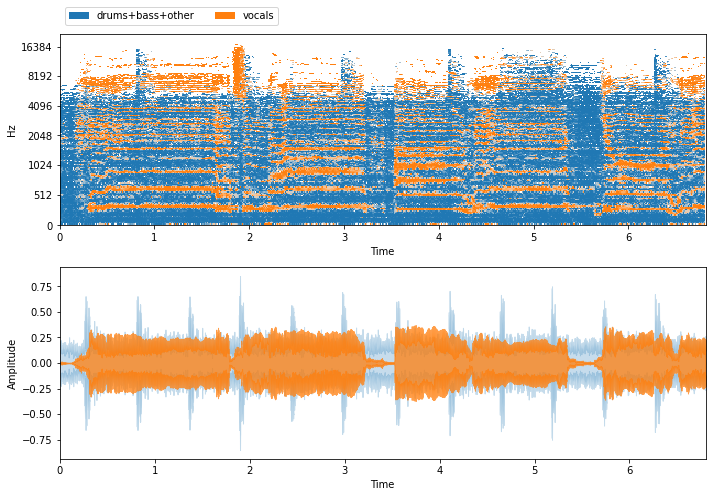


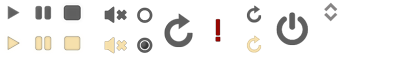
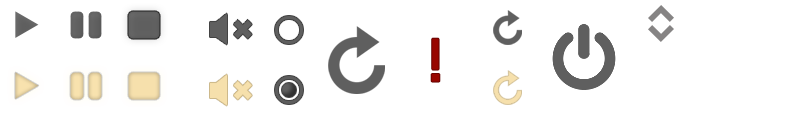
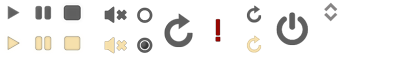

In [ ]:
i = 54

item = musdb_extract_tfm[i]
mix = item['mix']
sources = item['sources']
truth = [sources['drums+bass+other'], sources['vocals']]

from voicesep.dataviz import visualize_and_embed
visualize_and_embed(sources)

## Modèles de séparation de voix existants

In [ ]:
from voicesep.models import evaluate_dict_models